When a person defaults on a loan, it means they fail to repay the loan according to the agreed terms
0 --> did not default, --> paid the loan ,
1 --> defaulted --> failed to pay the loan ! 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest,mutual_info_classif

In [3]:
df = pd.read_csv("F:\dataset_for_ML\supervised\loan_defaulted\loan_defaulted.csv")

In [4]:
df.head()

,Age,Income,Education_Level,Marital_Status,Num_Children,Credit_Score,Home_Owner,Years_at_Job,Has_Debt,Online_Purchases_per_Month,...,Monthly_Rent,Employment_Type,Work_From_Home,Has_Student_Loan,Travel_Abroad_Per_Year,Health_Insurance,Phone_Usage_Hours,Daily_Internet_Usage_Hours,Fitness_Activity_Level,Defaulted
0,30,38291,2,1,3,759,0,24,1,3,...,1446,1,0,1,0,0,2.797999,5.727237,2,0
1,51,87787,2,1,1,377,0,10,0,1,...,1987,1,0,0,1,0,4.677039,6.654705,3,0
2,42,35542,4,0,4,715,0,13,0,4,...,272,1,1,0,2,0,4.129920,1.777825,3,0
3,24,47619,4,0,3,489,1,21,0,2,...,1367,2,1,0,1,1,4.958803,3.974367,2,0
4,69,57278,3,0,3,468,0,3,0,1,...,1027,1,1,1,0,1,4.815743,4.297444,3,1


In [5]:
df.isna().sum(),df.duplicated().sum()

(Age                           0
 Income                        0
 Education_Level               0
 Marital_Status                0
 Num_Children                  0
 Credit_Score                  0
 Home_Owner                    0
 Years_at_Job                  0
 Has_Debt                      0
 Online_Purchases_per_Month    0
 Savings_Account_Balance       0
 Checking_Account_Balance      0
 Loan_Amount                   0
 Loan_Term_Years               0
 Has_Credit_Card               0
 Num_Credit_Cards              0
 Monthly_Rent                  0
 Employment_Type               0
 Work_From_Home                0
 Has_Student_Loan              0
 Travel_Abroad_Per_Year        0
 Health_Insurance              0
 Phone_Usage_Hours             0
 Daily_Internet_Usage_Hours    0
 Fitness_Activity_Level        0
 Defaulted                     0
 dtype: int64,
 0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         40000 non-null  int64  
 1   Income                      40000 non-null  int64  
 2   Education_Level             40000 non-null  int64  
 3   Marital_Status              40000 non-null  int64  
 4   Num_Children                40000 non-null  int64  
 5   Credit_Score                40000 non-null  int64  
 6   Home_Owner                  40000 non-null  int64  
 7   Years_at_Job                40000 non-null  int64  
 8   Has_Debt                    40000 non-null  int64  
 9   Online_Purchases_per_Month  40000 non-null  int64  
 10  Savings_Account_Balance     40000 non-null  int64  
 11  Checking_Account_Balance    40000 non-null  int64  
 12  Loan_Amount                 40000 non-null  int64  
 13  Loan_Term_Years             400

In [7]:
X = df.iloc[:,:-1]
y = df["Defaulted"]

In [8]:
X

,Age,Income,Education_Level,Marital_Status,Num_Children,Credit_Score,Home_Owner,Years_at_Job,Has_Debt,Online_Purchases_per_Month,...,Num_Credit_Cards,Monthly_Rent,Employment_Type,Work_From_Home,Has_Student_Loan,Travel_Abroad_Per_Year,Health_Insurance,Phone_Usage_Hours,Daily_Internet_Usage_Hours,Fitness_Activity_Level
0,30,38291,2,1,3,759,0,24,1,3,...,2,1446,1,0,1,0,0,2.797999,5.727237,2
1,51,87787,2,1,1,377,0,10,0,1,...,3,1987,1,0,0,1,0,4.677039,6.654705,3
2,42,35542,4,0,4,715,0,13,0,4,...,4,272,1,1,0,2,0,4.129920,1.777825,3
3,24,47619,4,0,3,489,1,21,0,2,...,0,1367,2,1,0,1,1,4.958803,3.974367,2
4,69,57278,3,0,3,468,0,3,0,1,...,0,1027,1,1,1,0,1,4.815743,4.297444,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,62,43031,1,1,4,528,0,31,0,6,...,2,974,2,0,1,0,1,1.469322,1.693085,0
39996,20,54953,3,0,4,350,0,2,0,3,...,2,1768,3,1,0,0,0,4.204857,5.633728,1
39997,55,60100,3,0,3,745,0,17,1,3,...,0,1234,1,0,0,1,0,2.269558,3.974178,3
39998,48,78243,3,0,2,583,0,34,1,1,...,1,1144,3,1,1,1,1,3.889695,7.705777,2


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [10]:
X_train.shape

(32000, 25)

In [11]:
dtc = DecisionTreeClassifier(random_state=42)

In [12]:
def calculate_feature(X_train,X_test,y_train,y_test,model):
    f1_score_list,recall_score_list,precision_score_list,accuracy_score_list = [],[],[],[]
    # for i in range(1,X.shape[1]+1):
    #     print(X[i])
    for i,column in enumerate(X_train.columns,1):
        # print(i,column)
        selector = SelectKBest(mutual_info_classif,k=i)
        selector.fit(X_train,y_train)
        selector_x_train = selector.transform(X_train)
        selector_x_test = selector.transform(X_test)

        # Using in the model 
        model.fit(selector_x_train,y_train)
        pred =  model.predict(selector_x_test)

        # calculating scores 

        f1score = round(f1_score(y_test,pred,average="weighted"),3)        
        accuracyscore = round(accuracy_score(y_test,pred),3)        
        recallscore = round(recall_score(y_test,pred,average="weighted"),3)        
        precisionscore = round(precision_score(y_test,pred,average="weighted"),3)  

        f1_score_list.append(f1score)      
        accuracy_score_list.append(accuracyscore)      
        recall_score_list.append(recallscore)      
        precision_score_list.append(precisionscore)     

    return f1_score_list,accuracy_score_list,recall_score_list,precision_score_list


In [ ]:
f1scores,accuracyscores,recallscores,precisionscores = calculate_feature(X_train,X_test,y_train,y_test,dtc)

c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [ ]:
recallscores

[0.846,
 0.846,
 0.846,
 0.846,
 0.846,
 0.846,
 0.846,
 0.811,
 0.726,
 0.735,
 0.72,
 0.719,
 0.732,
 0.732,
 0.728,
 0.728,
 0.727,
 0.736,
 0.731,
 0.728,
 0.734,
 0.734,
 0.729,
 0.736,
 0.733]

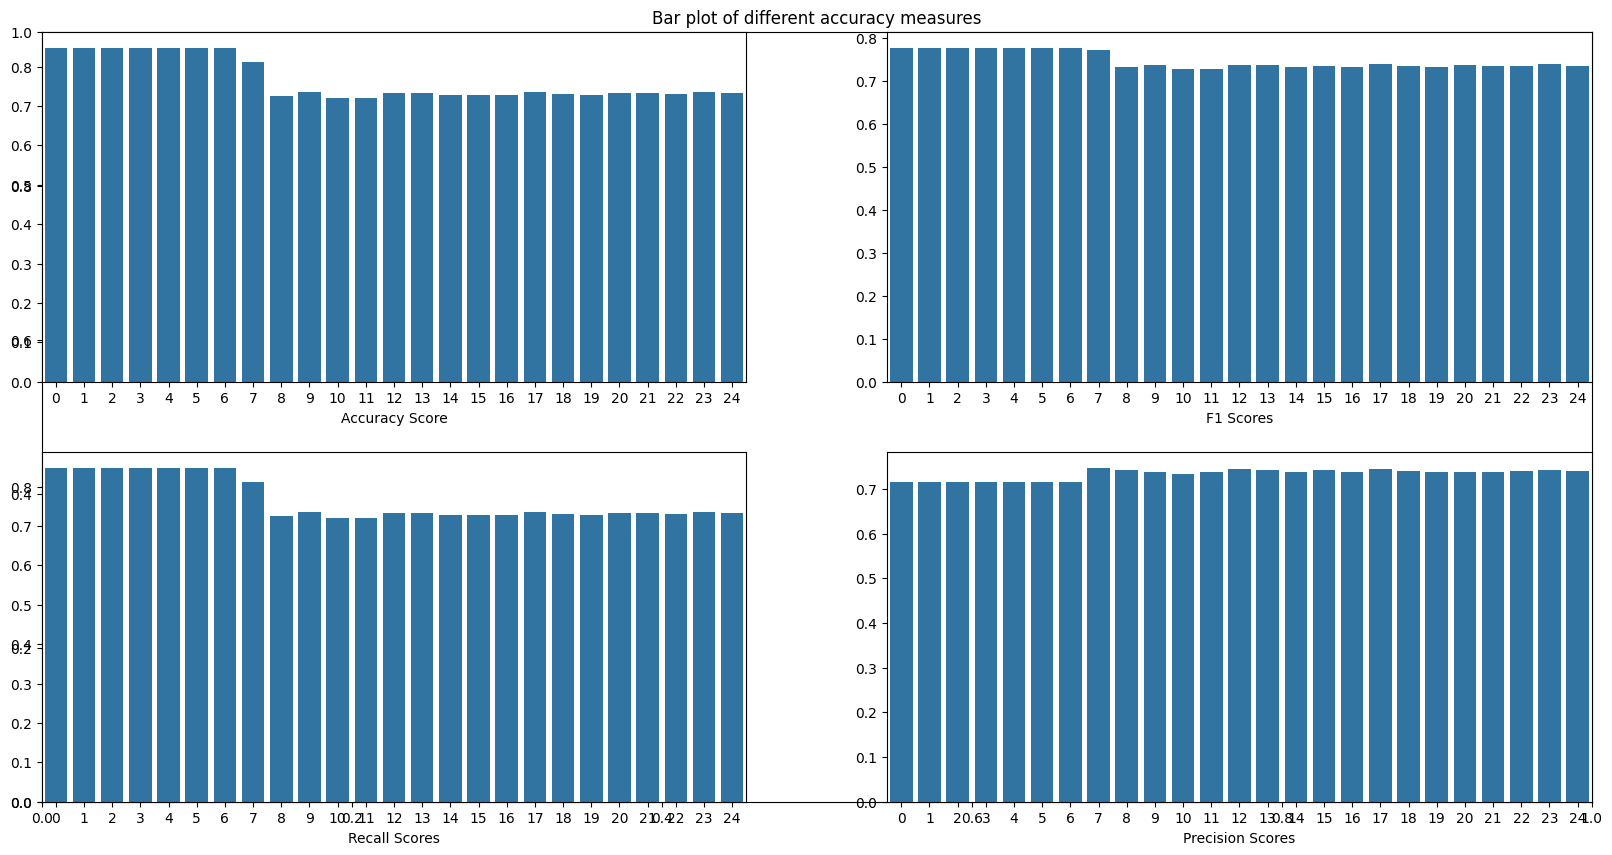

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Bar plot of different accuracy measures")
plt.subplot(2,2,1)
sns.barplot(accuracyscores)
plt.xlabel("Accuracy Score")
plt.subplot(2,2,2)
sns.barplot(f1scores)
plt.xlabel("F1 Scores")
plt.subplot(2,2,3)
sns.barplot(recallscores)
plt.xlabel("Recall Scores")
plt.subplot(2,2,4)
sns.barplot(precisionscores)
plt.xlabel("Precision Scores")
plt.show()

k = 5 looks good, let's try that 

In [ ]:
selector_final = SelectKBest(mutual_info_classif,k=5)
selector_final.fit(X_train,y_train)


SelectKBest(k=5,
            score_func=<function mutual_info_classif at 0x0000010C59859B40>)

In [ ]:
selected_feature_mask = selector_final.get_support()

NameError: name 'selector_final' is not defined

In [ ]:
selected_feature_mask

In [ ]:
selector_final.get_feature_names_out()

array(['Education_Level', 'Marital_Status', 'Home_Owner', 'Has_Debt',
       'Work_From_Home'], dtype=object)

In [ ]:
selected_features = X_train.columns[selected_feature_mask]

In [ ]:
selected_features

Index(['Education_Level', 'Marital_Status', 'Home_Owner', 'Has_Debt',
       'Work_From_Home'],
      dtype='object')

use feature_names_out to directly see the columns ! 

In [ ]:
selector_final.get_feature_names_out()

array(['Education_Level', 'Marital_Status', 'Home_Owner', 'Has_Debt',
       'Work_From_Home'], dtype=object)

In [ ]:
dtc.fit(X_train[selector_final.get_feature_names_out()],y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
pred_1 = dtc.predict(X_test[selector_final.get_feature_names_out()])

In [ ]:
accuracyScore = round(accuracy_score(pred_1,y_test),3)
recallScore =round(recall_score(pred_1,y_test,average="weighted"),3)
f1score =round(f1_score(pred_1,y_test,average="weighted"),3)
precisionscore = round(precision_score(pred_1,y_test,average="weighted"),3)

c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
accuracyScore,recallScore,f1score,precisionscore

(0.846, 0.846, 0.917, 1.0)

is this the best ? , let's do it without using feature selection and get the accuracy

In [ ]:
dtc.fit(X_train,y_train)
raw_pred = dtc.predict(X_test)

In [ ]:
accuracyScore = round(accuracy_score(raw_pred,y_test),3)
recallScore =round(recall_score(raw_pred,y_test,average="weighted"),3)
f1score =round(f1_score(raw_pred,y_test,average="weighted"),3)
precisionscore = round(precision_score(raw_pred,y_test,average="weighted"),3)

In [ ]:
accuracyScore,recallScore,f1score,precisionscore

(0.733, 0.733, 0.73, 0.726)

WELLLLLLLLLLLLLLL, WE SEE THE RESULTS! LETS GOOOOOOOOOOOOOOOOOOOOOOOOO
 